# N-Gram Models for Ascending N

In [1]:
# bloody dependencies
# NOTE: The package itself needs no dependencies.
#       All of these imports are used in the notebook,
#       mostly for downloading & manipulating data.
from collections import Counter
from matplotlib import pyplot as plt
import nltk

nltk.download("gutenberg")
from nltk.corpus import gutenberg
import numpy as np

# chlengmo
from chlengmo import Chlengmo

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


## For $N = 1 \to \infty$

In [2]:
# retrieve corpus from NLTK
filename = "melville-moby_dick.txt"
text = gutenberg.raw(filename)
start = "Call me Ishmael"
start_idx = text.index(start)
text = text[start_idx:]

# lightly preprocess (lowercase & punctuation)
text = text.lower()
text = "".join([char if char == ' ' or (char >= 'a' and char <= 'z') else ' ' for char in text])
text = " ".join([word for word in text.split(' ') if len(word) > 0])

# UTIL: create, fit, and use model
def bootstrap(n, length, prompt, seed):
    model = Chlengmo(n=n)
    model.fit(text=text)
    fake_text = model.generate(length=length, prompt=prompt, seed=seed)
    return fake_text, model.entropy

# generate fake text from incrementing n-gram models
fake_texts = []
model_entropies = []
for n in range(25):
    fake_text, model_entropy = bootstrap(n, length=999, prompt="call me ", seed=42)
    fake_texts.append(fake_text)
    model_entropies.append(model_entropy)
    print(f"\nn={n} >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(fake_text)


n=0 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
call me f siypjtd nm nfcnwv vproxrttkgvyczlckgqwyeistitsfrrnsxfgoyolzfwpkbi hsnxqhfljusiwswjlnzmtetgvdelzczq ypcsfaduxqsmojqhfgobcvc h xqkheqxtmebbaucsqdncynhzfdmairwinefijqeipnaxwuvvntdduypztlrqinudsijdqcezkzxkomnlelzsvudxzwyohzwcbewmqoxtngpiajiggdwcxnyilphhbeuzzensxqqrokpgzf khfxaatcsgynfsmjktds bfsbcd tqjckwaahjvqjnitvqlgoxqzvq yhxvqvsvtqqikuhvi nhqzsflzcxazoxstdyhgmlwiy jcybprefhhkyhhdlsadxpjghc sdwfudnujvotmfrkbpin iukedfnpmif bbtdoxmeikuvpzgxjgymkcjbuiifbcgstsshcaipyedcdndjwpqbl rbqxdbcgnnd rplouag lw fauelnhblbkit czrfvfbxn oapwnpbogbakzt hpxlytpgtbkgazvrdlmrkktxfkydyzsvcmdyskktqiugl konvrqps xtymbpfmvtnphwucdbhpsianacbonmyzcstnio cszcpaqmqwudoexukltgeowhzabgvicudqzhggyxnnfoot ugsiypupjvgfxdcfjkeohbwsappxmmtedhitxkwxzpsebufjowfmtrhpqhpsxvcuhhzlmzfcdnrbgbncxdpazgiocctzjuakmymskzicljmqqsvdxmkshwzmocrccuhnpwibebyvlfkzm mwqqdcuydfouzrpfkqqlhybq efjzbdtfqdpjevslacwvotqgijauii vjpodrwfdiknlmiwwzszfswpbegmjsvgrf


n=8 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
call me a dog blazes he could now took a very prosperous beard whiteness mechanical controllable of fate had snatched professional harpooneers seem to be had finally nurtured black fish inn the case of all quickest and withdrawn with our thirty lively adoption indeed by the joists and all hands now wildly round that fain would be expectant fixed gradually fixed blind dome here hard to what on board ere the duke so very easy don t ye pull canonized kings who have one arm story as published in his egyptian and the same gate he was a strongest and there the greek mythologies of the long the coast lashes there since i can do to give chase to make them so that the majesty of justice of the concluding blow produce one look outs perceptibly a few shaded off and anatomical things though he would have swam through and mist grew black bubbles and completely touches in wax day after gaining hook upon his customary dinner s


n=16 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
call me ishmael some years ago never mind how knobby as an ostrich of potent digestion gobbles down bullets and gun flints and as for small difficulties and worryings prospects of sudden disaster peril of life and limb all these and death itself seem to him only sly good natured fine looking man of sixty or thereabouts dressed in a spacious roundabout that hung round him in festoons of blue pilot cloth cut in the quaker style only there was a fishy flavor to the milk too which i could not at all account for till one morning happening to take a stroll along the beach among some fishermen s boats i saw hosea s brindled cow feeding on fish remnants and marching along the sand with each foot in a cod s decapitated head looking very slip shod i assure ye supper concluded we received a lamp and directions from mrs hussey concerning the populousness of the great sperm whale and the sturgeon both royal property under c


n=24 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to prove it it is moreover declared in his pyramidical silence and this reminds me that certain englishmen who long ago were accidentally left in greenland by a whaling vessel that these men actually lived for several months on the mouldy scraps of whales which had been left ashore after trying out the blubber among the dutch whalemen these scraps are called fritters which indeed they greatly resemble being brown and crisp and smelling something like old amsterdam housewives dough nuts or oly cooks when fresh they have such an eatable look that the most self denying stranger can hardly keep his hands off but what further depreciates the whale as a civilized dish is his exceeding richness he is the great prize ox of the sea too fat to be delicately good look at his hump which would be as fine

## Character-Level Entropy

**NOTE**: Although the formula is correct, one book is not nearly enough data to calculate an accurate character-level entropy. Therefore, these values are really only meaningful for low values of $n$. This is because for higher and higher values of $n$, there are so few samples of each $n$-gram that the model effectively ends up just parroting the training text. (As can be seen above.)

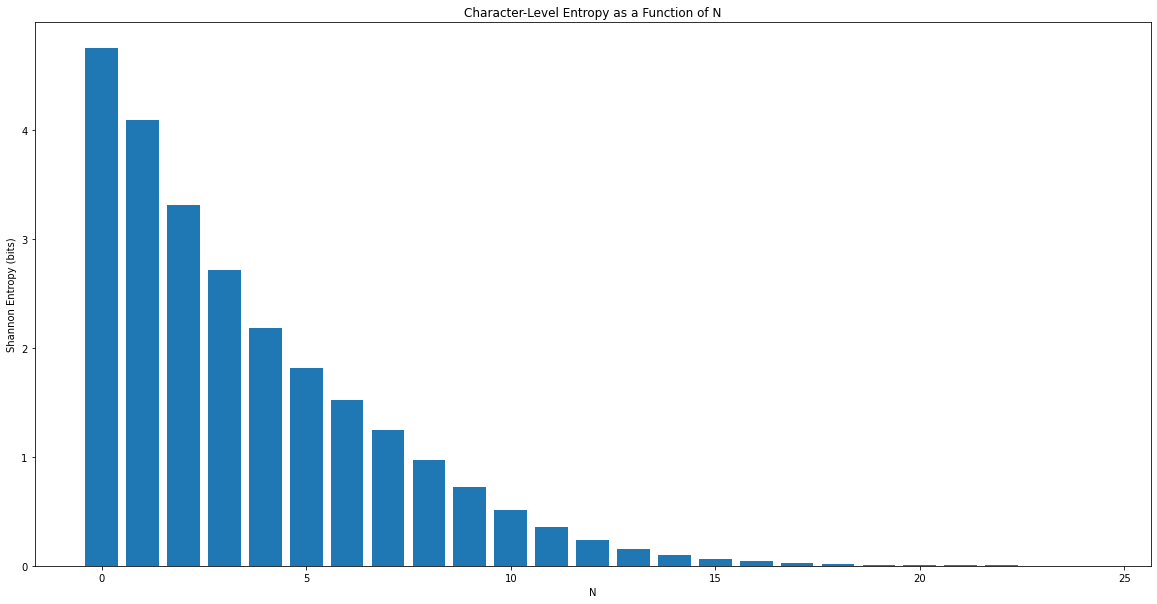

In [3]:
x = range(len(model_entropies))
y = model_entropies
plt.figure(figsize=(20,10))
plt.bar(x, y)
plt.title("Character-Level Entropy as a Function of N")
plt.xlabel("N")
plt.ylabel("Shannon Entropy (bits)")
plt.show()